<a href="https://colab.research.google.com/github/hflautert/AnomalyDetection/blob/main/ModeloHMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo de histórico de médias móveis para reconhecimento de anomalias.

O modelo possui 3 variáveis para configuração do reconhecimento de anomalia.

*   Taxa de crescimento sucessivo entre as últimas 3 médias móveis.
*   Número de amostras para formação da média móvel.
*   Taxa mínima para considerar variação das médias móveis.

In [ ]:
# Importando bibliotecas
# Manipulação de matrizes e operações matemáticas de alto nível
import numpy as np
# Geração de gráficos
import matplotlib.pyplot as plt
# Funções apresentação dos conceitos
import httpimport
url = "https://gist.githubusercontent.com/hflautert/83581f38442f4fe807f4135cef7876de/raw/5418356fa37971801491787cc5f0d5eabae211bb"
with httpimport.remote_repo(url):
  import conceitos as fmm

Primeiramente visualizamos o crescimento hipotético com diferentes porcentagens. Assim é possível perceber as possibilidades de configuração da taxa de crescimento entre médias móveis.

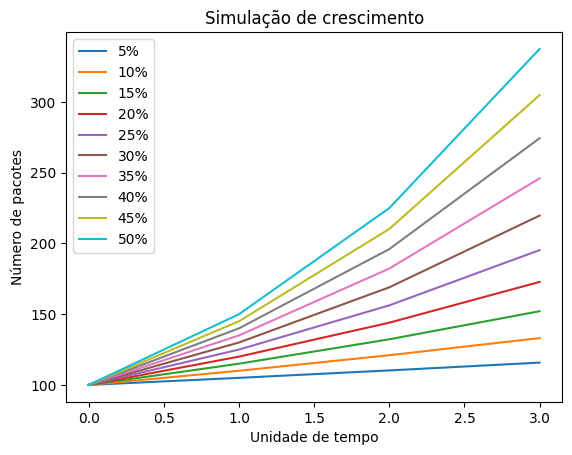

In [ ]:
# Construindo crescimento percentual
percentual=[1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5]
unidades=4
exemplo=np.ones((unidades,len(percentual)))
coluna=0
for i in percentual:
  valor=100
  #print('\nCrescimento de:',i)
  for n in range(0, unidades):
    #print(valor)
    exemplo[n][coluna]=valor
    valor=valor*i
  coluna=coluna+1

# Exibindo gráfico
for i in range(0,len(percentual)):
  legenda=format((percentual[i]-1), ".0%")
  plt.plot(exemplo[:,i], label = legenda)
plt.title('Simulação de crescimento')
plt.xlabel('Unidade de tempo')
plt.ylabel('Número de pacotes')
plt.legend(loc='best')
plt.show()

Aqui é exibido a detectçao de um ataque, com enfase no primeira variável do modelo, o crescimento sucessivo das últimas 3 médias móveis.

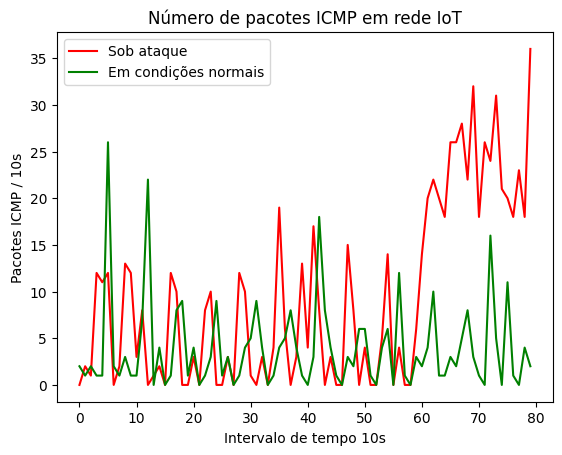

5.0 5.666666666666667 6.3


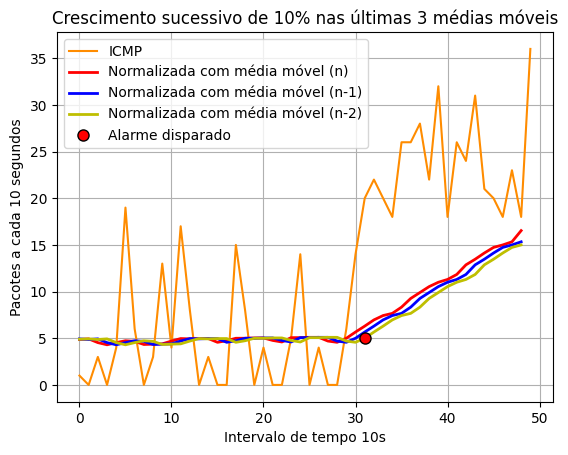

In [ ]:
# Carregamento dos dados
dados_normal_1m=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-05-31_benign_icmp_1m.csv")
dados_normal_10s=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-05-31_benign_icmp_10s.csv")
dados_normal_1s=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-05-31_benign_icmp_1s.csv")

dados_ataque_1m=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-10-23_icmp_1m.csv")
dados_ataque_10s=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-10-23_icmp_10s.csv")
dados_ataque_1s=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/Stats/18-10-23_icmp_1s.csv")

tipo_dos_pacotes='ICMP'

#fmm.visualiza(dados_normal_10s,'10s','g','Rede IoT em condições normais',tipo_dos_pacotes)
#fmm.visualiza(dados_ataque_10s,'10s','r','Rede IoT sob ataque',tipo_dos_pacotes)
#fmm.visualizamix(dados_ataque_1s,'r',dados_normal_1s,'g','10s',tipo_dos_pacotes)

# Vizualização otimizada com zoom na janela de ataque de 1, 10 e 100 pcts/s
v_dados_normal_10s = dados_normal_10s[:80]
v_dados_ataque_10s = dados_ataque_10s[4580:4660]

# Unindo linhas
plt.plot(v_dados_ataque_10s, color = 'r', label = "Sob ataque")
plt.plot(v_dados_normal_10s, color = 'g', label = "Em condições normais")
plt.title('Número de pacotes '+tipo_dos_pacotes+' em rede IoT')
plt.xlabel('Intervalo de tempo 10s')
plt.ylabel('Pacotes '+tipo_dos_pacotes+' / 10s')
plt.legend()
plt.show()

# Medias moveis - historico de 30 medidas
media,media_1,media_2,alarme_pos,alarme_val=fmm.aplica_var_mm(v_dados_ataque_10s,1.10,30,2)
plt.plot(v_dados_ataque_10s[30:], color = 'darkorange', label = "ICMP")
plt.plot(media, color = 'r',linewidth=2, label = "Normalizada com média móvel (n)")
plt.plot(media_1, color = 'b',linewidth=2, label = "Normalizada com média móvel (n-1)")
plt.plot(media_2, color = 'y',linewidth=2, label = "Normalizada com média móvel (n-2)")
plt.plot(alarme_pos[0],alarme_val[0], 'ro', ms=8, mec='k', label = "Alarme disparado")
plt.title('Crescimento sucessivo de 10% nas últimas 3 médias móveis')
plt.xlabel('Intervalo de tempo 10s')
plt.ylabel('Pacotes a cada 10 segundos')
plt.legend()
plt.grid()
plt.show()

Nesta etapa visualizamos o efeito na alteração no número de amostras para formação das médias móveis (2º variável de configuração do modelo). Enquanto maior o número de amostras, menor a variação das médias. O que torna o modelo menos sensível, para evitar casos de falsos positivos.

458.4 523.1 582.7
437.1 493.5 550.2
24.9 48.4 104.7


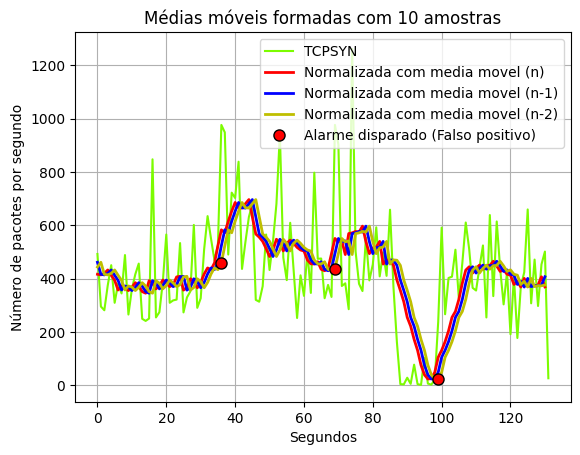

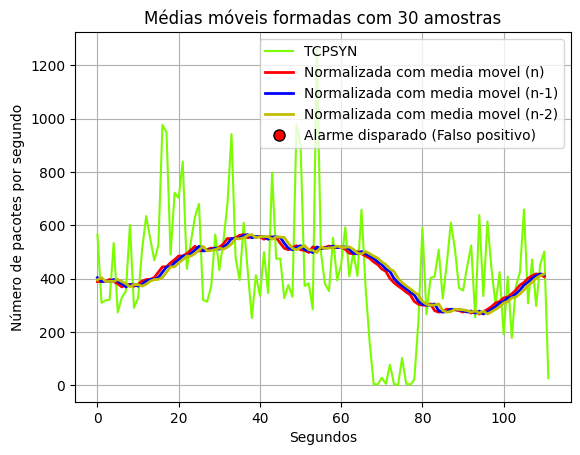

In [ ]:
# Carregamento dos dados
dados_normal_100ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/benign-dec_tcpsyn_100ms.csv")
dados_normal_500ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/benign-dec_tcpsyn_500ms.csv")
dados_normal_1s=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/benign-dec_tcpsyn_1s.csv")

v_dados_normal_1s = dados_normal_1s[160:]

# Intervalos
amostras1=10
amostras2=30

# Medias moveis - historico de 10 medidas
media,media_1,media_2,alarme_pos,alarme_val=fmm.aplica_var_mm(v_dados_normal_1s,1.10,amostras1,20)
plt.plot(v_dados_normal_1s[amostras1:], color = 'lawngreen', label = "TCPSYN")
plt.plot(media[:], color = 'r',linewidth=2, label = "Normalizada com media movel (n)")
plt.plot(media_1[:], color = 'b',linewidth=2, label = "Normalizada com media movel (n-1)")
plt.plot(media_2[:], color = 'y',linewidth=2, label = "Normalizada com media movel (n-2)")
plt.plot(alarme_pos,alarme_val, 'ro', ms=8, mec='k', label = "Alarme disparado (Falso positivo)")
plt.title('Médias móveis formadas com 10 amostras')
plt.xlabel('Segundos')
plt.ylabel('Número de pacotes por segundo')
plt.legend()
plt.grid()
plt.show()

# Medias moveis - historico de 30 medidas
media,media_1,media_2,alarme_pos,alarme_val=fmm.aplica_var_mm(v_dados_normal_1s,1.10,amostras2,20)
plt.plot(v_dados_normal_1s[amostras2:], color = 'lawngreen', label = "TCPSYN")
plt.plot(media[:], color = 'r',linewidth=2, label = "Normalizada com media movel (n)")
plt.plot(media_1[:], color = 'b',linewidth=2, label = "Normalizada com media movel (n-1)")
plt.plot(media_2[:], color = 'y',linewidth=2, label = "Normalizada com media movel (n-2)")
plt.plot(alarme_pos,alarme_val, 'ro', ms=8, mec='k', label = "Alarme disparado (Falso positivo)")
plt.title('Médias móveis formadas com 30 amostras')
plt.xlabel('Segundos')
plt.ylabel('Número de pacotes por segundo')
plt.legend()
plt.grid()
plt.show()

Por fim é possível observar a aplicação da taxa mínima para considerar a variação das médias móveis.

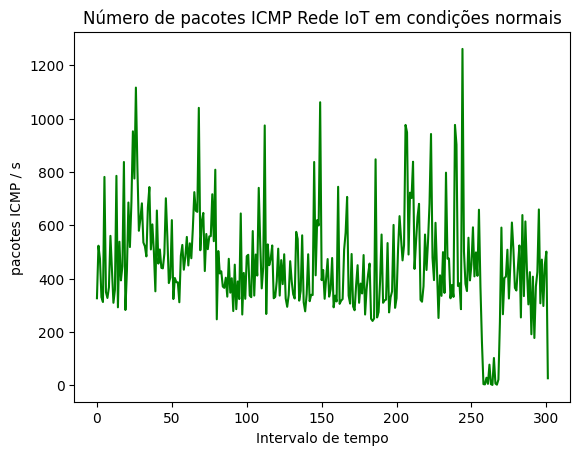

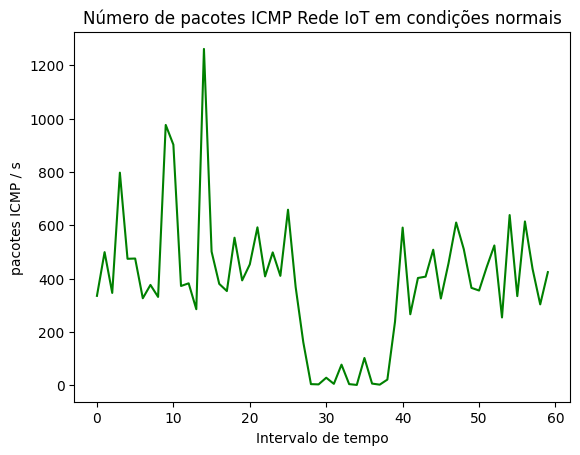

In [ ]:
# Carregamento dos dados
dados_normal_100ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/benign-dec_tcpsyn_100ms.csv")
dados_normal_500ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/benign-dec_tcpsyn_500ms.csv")
dados_normal_1s=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsIOTINd/benign-dec_tcpsyn_1s.csv")

fmm.visualiza(dados_normal_1s,'s','g','Rede IoT em condições normais',tipo_dos_pacotes)

#Zoom na área de maior interesse
v_dados_normal_1s = dados_normal_1s[230:290]

fmm.visualiza(v_dados_normal_1s,'s','g','Rede IoT em condições normais',tipo_dos_pacotes)

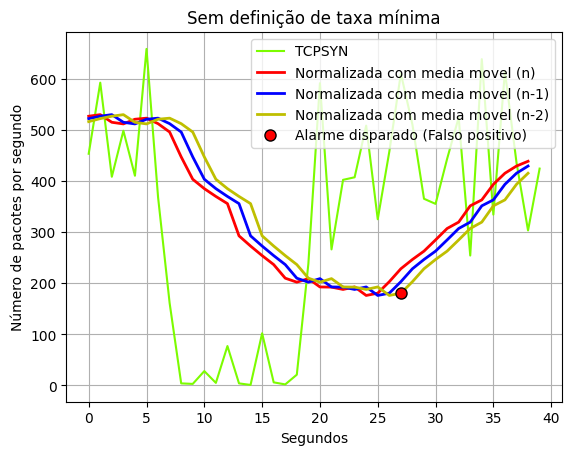

In [ ]:
# Medias moveis
media,media_1,media_2,alarme_pos,alarme_val=fmm.aplica_var_tm(v_dados_normal_1s,1.10,20,0)
plt.plot(v_dados_normal_1s[20:], color = 'lawngreen', label = "TCPSYN")
plt.plot(media[:], color = 'r',linewidth=2, label = "Normalizada com media movel (n)")
plt.plot(media_1[:], color = 'b',linewidth=2, label = "Normalizada com media movel (n-1)")
plt.plot(media_2[:], color = 'y',linewidth=2, label = "Normalizada com media movel (n-2)")
plt.plot(alarme_pos,alarme_val, 'ro', ms=8, mec='k', label = "Alarme disparado (Falso positivo)")
plt.title('Sem definição de taxa mínima')
plt.xlabel('Segundos')
plt.ylabel('Número de pacotes por segundo')
plt.legend()
plt.grid()
plt.show()

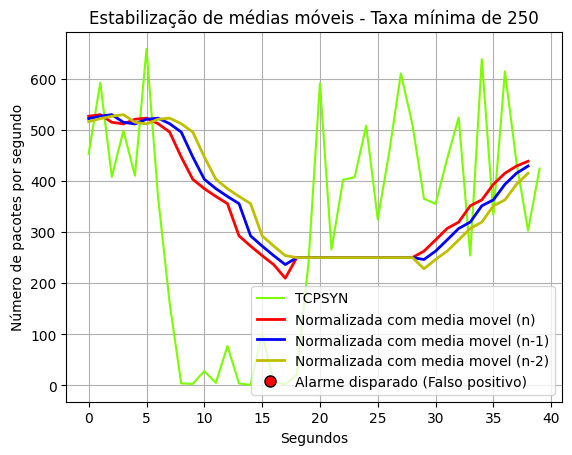

In [ ]:
# Medias moveis
media,media_1,media_2,alarme_pos,alarme_val=fmm.aplica_var_tm(v_dados_normal_1s,1.10,20,250)
plt.plot(v_dados_normal_1s[20:], color = 'lawngreen', label = "TCPSYN")
plt.plot(media[:], color = 'r',linewidth=2, label = "Normalizada com media movel (n)")
plt.plot(media_1[:], color = 'b',linewidth=2, label = "Normalizada com media movel (n-1)")
plt.plot(media_2[:], color = 'y',linewidth=2, label = "Normalizada com media movel (n-2)")
plt.plot(alarme_pos,alarme_val, 'ro', ms=8, mec='k', label = "Alarme disparado (Falso positivo)")
plt.title('Estabilização de médias móveis - Taxa mínima de 250')
plt.xlabel('Segundos')
plt.ylabel('Número de pacotes por segundo')
plt.legend()
plt.grid()
plt.show()

Foram realizados testes de reconhecimento de ataques do tipo TCPSYN, UDP (Fraggle), ICMP (Smurf), SSDP Reflection, SNMP Reflection, UDP (Mirai), HTTP (Mirai), MQTT-Malaria. Somados todos os experimentos, em diferentes intervalos de tempo, de 1m, 10s, 1s, 500ms e 100ms, foram geradas 423 amostras de ataques, onde 398 foram reconhecidas com sucesso. Ocorreram 4 casos de falsos positivos. A precisão geral modelo ficou em 93,21\%. Todos os experimentos realizados, bem como os arquivos que alimentam o modelo, estão disponíveis neste mesmo repositório.